<a href="https://colab.research.google.com/github/AniekanInyang/AutoML-with-PyCaret/blob/main/AutoML%20intro%20with%20PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import logging, sys
logging.disable(sys.maxsize)

In [2]:
# Install necessary packages

!pip install pycaret==3.0.0.rc4
!pip install catboost
!pip install xgboost==1.1.0
!pip uninstall -y matplotlib
!pip install -U matplotlib==3.1.3
!pip install evidently
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 896 kB/s 
     |████████████████████████████████| 44 kB 1.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 280 kB 42.2 MB/s 
     |████████████████████████████████| 11.2 MB 47.2 MB/s 
     |████████████████████████████████| 141 kB 35.2 MB/s 
     |████████████████████████████████| 1.4 MB 58.9 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 2.0 MB 37.8 MB/s 
     |████████████████████████████████| 79.9 MB 126 kB/s 
     |████████████████████████████████| 7.0 MB 21.5 MB/s 
     |████████████████████████████████| 3.3 MB 50.1 MB/s 
     |████████████████████████████████| 72 kB 964 kB/s 
     |███████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 10 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 2.5 MB/s 
     |████████████████████████████████| 636 kB 41.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.0 MB 174 kB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 147 kB 73.4 MB/s 
     |████████████████████████████████| 209 kB 40.9 MB/s 
     |████████████████████████████████| 182 kB 69.9 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 140 kB 72.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████

In [3]:
# Import libraries to be used

import pandas as pd
import numpy as np
import pycaret
import matplotlib
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils.generic import check_metric, enable_colab
enable_colab()

In [4]:
# To see a list of all sample datasets provided by PyCaret

all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [5]:
# Using the employee dataset

employee = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [6]:
employee.shape

(14999, 10)

In [7]:
employee['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
# Train-test data split

train_data = employee.sample(frac=0.95, random_state=42)
test_data = employee.drop(train_data.index)
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)
print('Train Data for Modeling: ' + str(train_data.shape))
print('Test Data For Predictions: ' + str(test_data.shape))

Train Data for Modeling: (14249, 10)
Test Data For Predictions: (750, 10)


In [9]:
# Initializing the model

classifier = setup(data = train_data, target = 'left',  session_id = 1, log_experiment = True, experiment_name = 'article_code1') 

,Description,Value
0,Session id,1
1,Target,left
2,Target type,Binary
3,Original data shape,"(14249, 10)"
4,Transformed data shape,"(14249, 12)"
5,Transformed train set shape,"(9974, 12)"
6,Transformed test set shape,"(4275, 12)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [10]:
# Automatically comparing the performances of different models on the train data

models_compared = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9857,0.9908,0.9500,0.9896,0.9693,0.9600,0.9604,0.6950
rf,Random Forest Classifier,0.9675,0.9865,0.9122,0.9516,0.9308,0.9096,0.9105,0.8330
dt,Decision Tree Classifier,0.9438,0.9376,0.9256,0.8712,0.8932,0.8559,0.8604,0.1890
knn,K Neighbors Classifier,0.9405,0.9711,0.9197,0.8452,0.8807,0.8413,0.8427,0.3360
gbc,Gradient Boosting Classifier,0.8988,0.9524,0.7214,0.8613,0.7760,0.7122,0.7234,1.1260
qda,Quadratic Discriminant Analysis,0.8895,0.9345,0.8538,0.7350,0.7882,0.7143,0.7194,0.2100
catboost,CatBoost Classifier,0.8456,0.9505,0.5332,0.8190,0.6289,0.5378,0.5681,4.3220
ada,Ada Boost Classifier,0.8405,0.8888,0.4584,0.8012,0.5764,0.4877,0.5204,0.7520
lr,Logistic Regression,0.7853,0.8196,0.3315,0.5882,0.4237,0.3045,0.3235,2.4390
ridge,Ridge Classifier,0.7749,0.0000,0.2521,0.5630,0.3480,0.2354,0.2632,0.1540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [11]:
# Hyperparameters of the currently best performing model

print(models_compared)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1, verbose=0, warm_start=False)


In [12]:
# To see all available models on PyCaret

models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
# Extra Trees classifer model 

et_model = create_model('et', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.986,0.996,0.962,0.979,0.970,0.961,0.961
1,0.983,0.987,0.933,0.996,0.963,0.952,0.953
2,0.982,0.987,0.937,0.987,0.961,0.949,0.950
3,0.988,0.993,0.958,0.991,0.974,0.967,0.967
4,0.984,0.988,0.950,0.983,0.966,0.955,0.956
5,0.988,0.994,0.962,0.987,0.974,0.967,0.967
6,0.983,0.988,0.929,1.000,0.963,0.952,0.953
7,0.985,0.994,0.954,0.983,0.968,0.958,0.958
8,0.987,0.988,0.950,0.996,0.972,0.964,0.964


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# Tuned Extra Trees classifer model 


tuned_et_model = tune_model(et_model, round = 3, optimize = 'Recall')

# Recall because we care about minimizing false negatives. i.e, we want to capture as many employees that actually left as possible. 
# Not accuracy because our dataset is slightly imbalanced.

# round returns the results rounded to three decimal places.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.954,0.979,0.933,0.881,0.906,0.876,0.876
1,0.955,0.974,0.908,0.904,0.906,0.876,0.876
2,0.953,0.976,0.908,0.896,0.902,0.871,0.871
3,0.969,0.984,0.941,0.929,0.935,0.915,0.915
4,0.972,0.978,0.933,0.949,0.941,0.922,0.922
5,0.957,0.979,0.903,0.915,0.909,0.881,0.881
6,0.962,0.982,0.933,0.910,0.921,0.896,0.896
7,0.952,0.976,0.916,0.886,0.901,0.869,0.869
8,0.958,0.979,0.912,0.912,0.912,0.884,0.884


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
# Decision Trees classifer model 

dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9699,0.9629,0.9496,0.9262,0.9378,0.9179,0.9181
1,0.9639,0.9446,0.9076,0.9391,0.9231,0.8995,0.8998
2,0.9719,0.9542,0.9202,0.9605,0.9399,0.9216,0.9220
3,0.9749,0.9619,0.9370,0.9571,0.9469,0.9305,0.9306
4,0.9779,0.9624,0.9328,0.9737,0.9528,0.9384,0.9388
5,0.9338,0.9291,0.9202,0.8233,0.8690,0.8249,0.8272
6,0.9288,0.9287,0.9286,0.8036,0.8616,0.8140,0.8178
7,0.8225,0.8589,0.9286,0.5801,0.7141,0.5951,0.6297
8,0.9318,0.9278,0.9202,0.8172,0.8656,0.8201,0.8227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
# Tuned Decision Trees classifer model 

tuned_dt_model = tune_model(dt_model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9669,0.9714,0.9244,0.9362,0.9302,0.9086,0.9086
1,0.9669,0.9742,0.9118,0.9476,0.9293,0.9078,0.9081
2,0.9649,0.9688,0.9076,0.9432,0.9251,0.9022,0.9025
3,0.9709,0.9801,0.9370,0.9409,0.9389,0.9199,0.9199
4,0.9759,0.9804,0.9328,0.9652,0.9487,0.9330,0.9332
5,0.9448,0.9432,0.9034,0.8704,0.8866,0.8502,0.8504
6,0.9769,0.9711,0.9328,0.9694,0.9507,0.9357,0.9360
7,0.9659,0.9698,0.9118,0.9435,0.9274,0.9051,0.9053
8,0.9288,0.9287,0.9034,0.8175,0.8583,0.8109,0.8127


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
# K-Nearest Neighbors classifer model 

knn_model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9389,0.9692,0.9244,0.8365,0.8782,0.8376,0.8394
1,0.9369,0.9650,0.8950,0.8486,0.8712,0.8294,0.8299
2,0.9419,0.9686,0.9034,0.8600,0.8811,0.8427,0.8432
3,0.9339,0.9766,0.9370,0.8139,0.8711,0.8269,0.8306
4,0.9418,0.9691,0.9244,0.8462,0.8835,0.8449,0.8463
5,0.9318,0.9719,0.9076,0.8244,0.8640,0.8186,0.8203
6,0.9458,0.9659,0.9202,0.8622,0.8902,0.8543,0.8551
7,0.9398,0.9762,0.9286,0.8371,0.8805,0.8404,0.8424
8,0.9438,0.9728,0.9160,0.8583,0.8862,0.8489,0.8497


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
# Tuned K-Nearest Neighbors classifer model 

tuned_knn_model = tune_model(knn_model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9519,0.9892,0.9664,0.8519,0.9055,0.8734,0.8766
1,0.9489,0.9781,0.9454,0.8555,0.8982,0.8642,0.8661
2,0.9629,0.9838,0.9580,0.8941,0.9249,0.9004,0.9013
3,0.9559,0.9888,0.9832,0.8540,0.9141,0.8846,0.8886
4,0.9549,0.9809,0.9580,0.8669,0.9102,0.8801,0.8821
5,0.9488,0.9866,0.9664,0.8425,0.9002,0.8660,0.8697
6,0.9549,0.9750,0.9496,0.8726,0.9095,0.8795,0.8809
7,0.9529,0.9814,0.9622,0.8577,0.9069,0.8755,0.8781
8,0.9629,0.9776,0.9664,0.8880,0.9256,0.9009,0.9023


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
# Random Forest classifer model 

rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9860,0.9948,0.9496,0.9912,0.9700,0.9608,0.9612
1,0.9760,0.9830,0.9076,0.9908,0.9474,0.9318,0.9333
2,0.9770,0.9866,0.9076,0.9954,0.9495,0.9346,0.9362
3,0.9840,0.9944,0.9370,0.9955,0.9654,0.9550,0.9557
4,0.9669,0.9901,0.8697,0.9904,0.9262,0.9050,0.9081
5,0.9549,0.9881,0.9034,0.9072,0.9053,0.8756,0.8756
6,0.9218,0.9737,0.8109,0.8540,0.8319,0.7810,0.7814
7,0.9569,0.9783,0.9412,0.8854,0.9124,0.8838,0.8846
8,0.9649,0.9822,0.9454,0.9109,0.9278,0.9047,0.9049


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
# Tuned Random Forest classifer model 

tuned_rf_model = tune_model(rf_model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7956,0.8616,0.9664,0.5399,0.6928,0.5573,0.6104
1,0.8096,0.8720,0.9622,0.5585,0.7068,0.5801,0.6271
2,0.8236,0.8822,0.9538,0.5791,0.7206,0.6027,0.6428
3,0.8096,0.8753,0.9622,0.5585,0.7068,0.5801,0.6271
4,0.8185,0.8862,0.9790,0.5697,0.7202,0.5993,0.6475
5,0.8084,0.8758,0.9580,0.5575,0.7048,0.5772,0.6236
6,0.8084,0.8692,0.9622,0.5572,0.7057,0.5782,0.6256
7,0.8024,0.8682,0.9538,0.5496,0.6974,0.5659,0.6133
8,0.8104,0.8841,0.9622,0.5599,0.7079,0.5816,0.6284


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
# Testing the tuned Random Forest model

predict_model(tuned_rf_model, drift_report = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8058,0.8775,0.9647,0.5534,0.7034,0.5743,0.6233


Random Forest Classifier_Drift_Report.html saved successfully.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_medium,salary_high,salary_low,left,prediction_label,prediction_score
9974,0.46,0.55,2.0,145.0,3.0,0.0,0.0,0.261918,0.0,0.0,1.0,1,1,0.8285
9975,0.11,0.83,6.0,244.0,4.0,0.0,0.0,0.279773,0.0,0.0,1.0,1,1,0.8285
9976,0.36,0.63,2.0,278.0,4.0,0.0,0.0,0.151163,0.0,0.0,1.0,0,1,0.8285
9977,0.98,0.58,4.0,136.0,3.0,0.0,0.0,0.261918,0.0,0.0,1.0,0,0,0.9410
9978,1.00,0.52,4.0,198.0,3.0,0.0,0.0,0.217466,1.0,0.0,0.0,0,0,0.9410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,0.85,0.81,2.0,223.0,3.0,1.0,0.0,0.217466,0.0,0.0,1.0,0,0,0.9410
14245,0.54,0.48,3.0,275.0,2.0,0.0,0.0,0.237117,0.0,1.0,0.0,0,0,0.9410
14246,0.52,0.58,3.0,203.0,2.0,0.0,0.0,0.151163,1.0,0.0,0.0,0,0,0.9410
14247,0.34,0.72,3.0,118.0,4.0,0.0,0.0,0.238566,0.0,0.0,1.0,0,1,0.8285


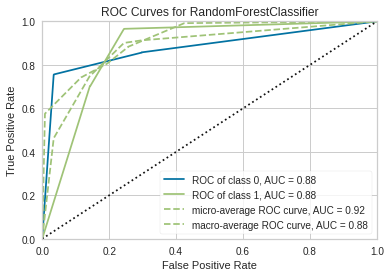

In [22]:
# Plotting AUC of the tuned Random Forest model

plot_model(tuned_rf_model, plot = 'auc')

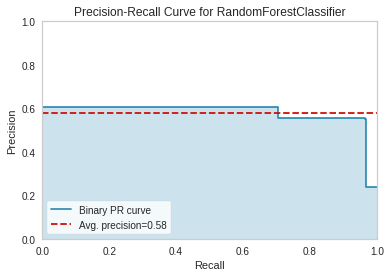

In [23]:
# Plotting Precision-Recall

plot_model(tuned_rf_model, plot = 'pr')

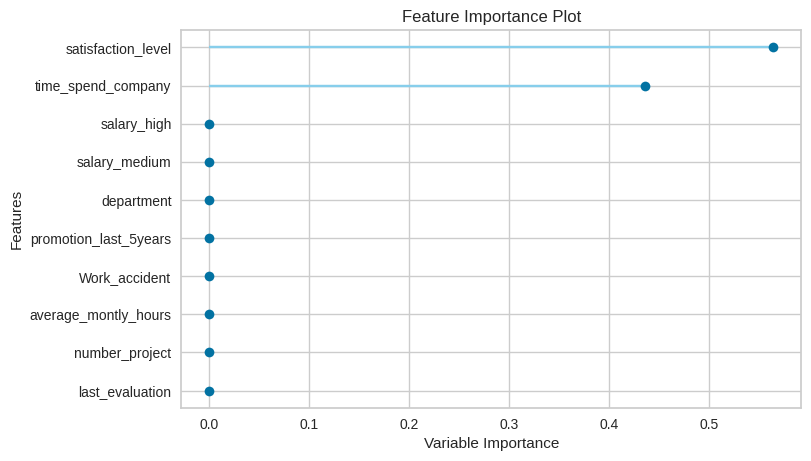

In [24]:
# Plotting Feature Importance

plot_model(tuned_rf_model, plot = 'feature')

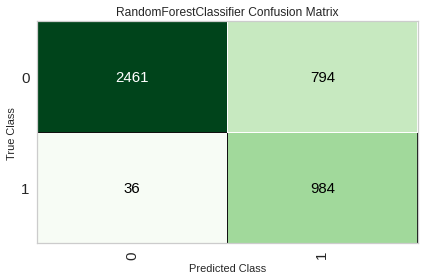

In [25]:
# Plotting Confusion matrix 

plot_model(tuned_rf_model, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

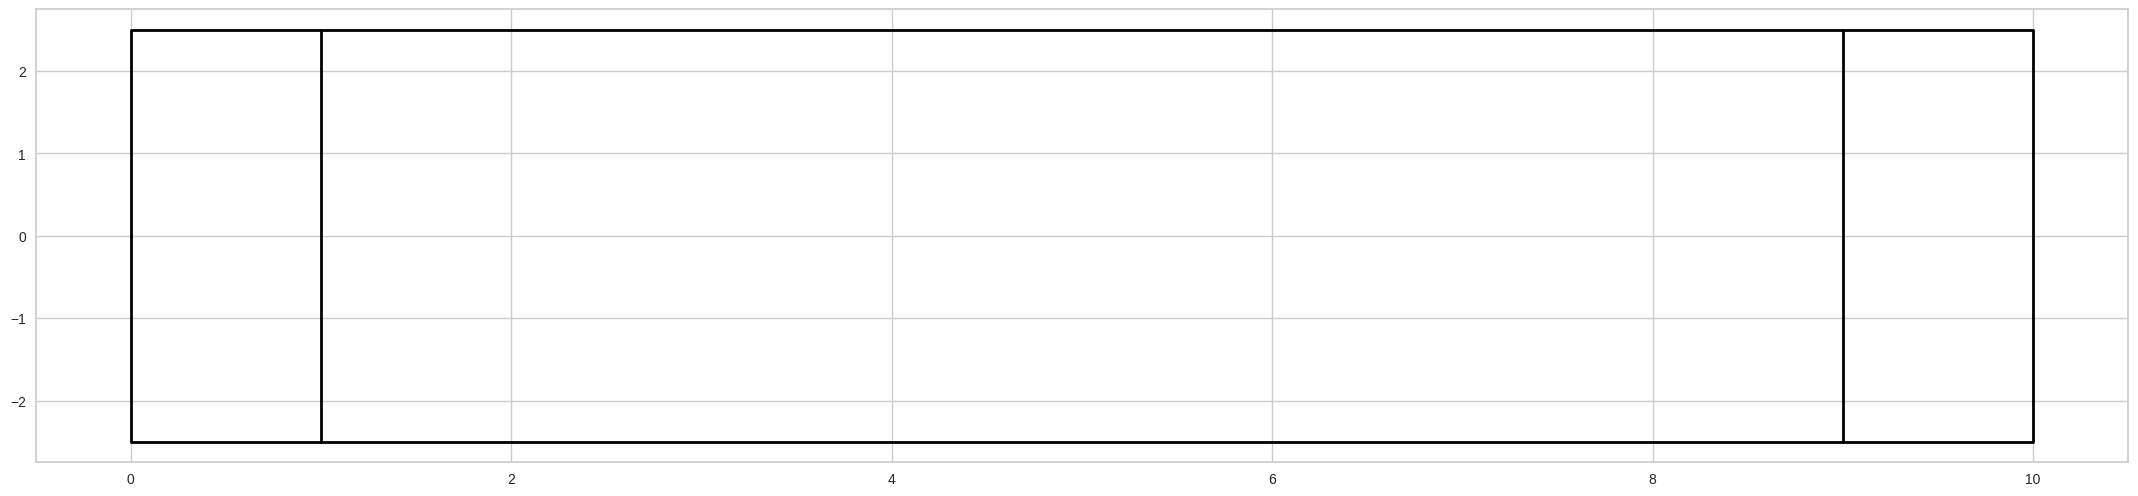

In [26]:
# Evaluate the overall performance of the model with different metrics

evaluate_model(tuned_rf_model)

In [27]:
# Finalize the model

final_rf = finalize_model(tuned_rf_model)

In [28]:
# Test the finalized model

predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8058,0.8774,0.9647,0.5534,0.7034,0.5743,0.6233


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_medium,salary_high,salary_low,left,prediction_label,prediction_score
9974,0.46,0.55,2.0,145.0,3.0,0.0,0.0,0.261918,0.0,0.0,1.0,1,1,0.8292
9975,0.11,0.83,6.0,244.0,4.0,0.0,0.0,0.279773,0.0,0.0,1.0,1,1,0.8292
9976,0.36,0.63,2.0,278.0,4.0,0.0,0.0,0.151163,0.0,0.0,1.0,0,1,0.8292
9977,0.98,0.58,4.0,136.0,3.0,0.0,0.0,0.261918,0.0,0.0,1.0,0,0,0.9478
9978,1.00,0.52,4.0,198.0,3.0,0.0,0.0,0.217466,1.0,0.0,0.0,0,0,0.9478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,0.85,0.81,2.0,223.0,3.0,1.0,0.0,0.217466,0.0,0.0,1.0,0,0,0.9478
14245,0.54,0.48,3.0,275.0,2.0,0.0,0.0,0.237117,0.0,1.0,0.0,0,0,0.9478
14246,0.52,0.58,3.0,203.0,2.0,0.0,0.0,0.151163,1.0,0.0,0.0,0,0,0.9478
14247,0.34,0.72,3.0,118.0,4.0,0.0,0.0,0.238566,0.0,0.0,1.0,0,1,0.8292


In [29]:
# Test the finalized model on unseen data

unseen_predictions = predict_model(final_rf, data = test_data)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8307,0.8990,0.9766,0.5759,0.7245,0.6137,0.6583


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_medium,salary_high,salary_low,left,prediction_label,prediction_score
0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.245668,0.0,0.0,1.0,1,1,0.8292
1,0.11,0.94,6.0,286.0,4.0,0.0,0.0,0.225000,1.0,0.0,0.0,1,1,0.8292
2,0.11,0.97,6.0,284.0,4.0,0.0,0.0,0.245668,0.0,0.0,1.0,1,1,0.8292
3,0.39,0.48,2.0,160.0,3.0,0.0,0.0,0.245668,0.0,0.0,1.0,1,1,0.8292
4,0.90,0.98,5.0,243.0,6.0,0.0,0.0,0.233861,0.0,0.0,1.0,1,1,0.7152


In [30]:
check_metric(unseen_predictions['left'], unseen_predictions['prediction_label'], metric = 'Recall')

0.9766

In [31]:
# Save the model

save_model(final_rf, 'Final RF Model 18Nov2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['satisfaction_level',
                                              'last_evaluation',
                                              'number_project',
                                              'average_montly_hours',
                                              'time_spend_company',
                                              'Work_accident',
                                              'promotion_last_5years'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               stra...
 

In [32]:
# For future use, you can load the model

#saved_final_rf = load_model('Final RF Model 18Nov2022')